In [1]:
#Ans1 - Loading the data and printing data dimension
import pandas as pd

# Loading the dataset
data = pd.read_csv("FluoridationData.csv")

# Printing the dimensions of the dataset
print("Data dimensions:", data.shape)

Data dimensions: (1059, 9)


In [2]:
#Ans2 - Displaying datatypes and printing the median values of float datatypes
# Displaying data types of all features
print("Data types of all features:")
print(data.dtypes)

# Printing median values for features with float data type
float_features = data.select_dtypes(include=['float'])
if not float_features.empty:
    print("\nMedian values for features with float data type:")
    print(float_features.median())
else:
    print("\nThere are no features with float data type.")

Data types of all features:
cartodb_id          int64
melbourne            bool
postcode            int64
id                  int64
fluoride_level     object
water_company      object
townsuburb         object
lat               float64
lon               float64
dtype: object

Median values for features with float data type:
lat    -37.788
lon    144.989
dtype: float64


In [3]:
#Ans3 - values and ratio of fluoride_level
# Printing all possible values of the feature "fluoride_level"
print("Possible values of the feature 'fluoride_level':")
print(data['fluoride_level'].unique())

# Calculating the ratio of each "fluoride_level" value
fluoride_level_counts = data['fluoride_level'].value_counts()
total_records = len(data)
print("\nRatio of each 'fluoride_level' value:")
for level, count in fluoride_level_counts.items():
    ratio = count / total_records
    print(f"{level}: {ratio:.2%}")

Possible values of the feature 'fluoride_level':
['Fluoridated' 'Not fluoridated' 'Partly fluoridated' 'Natural fluoride']

Ratio of each 'fluoride_level' value:
Fluoridated: 74.32%
Not fluoridated: 24.17%
Partly fluoridated: 1.32%
Natural fluoride: 0.19%


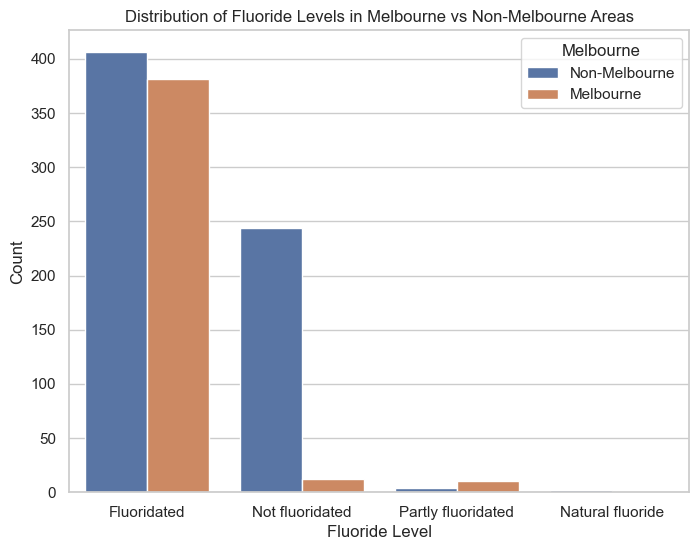

In [4]:
#Ans4 - Association between Melbourne and fluoride_level
#Importing necessary packages
import matplotlib.pyplot as plt
import seaborn as sns

# Converting 'melbourne' column to string type
data['melbourne'] = data['melbourne'].astype(str)

# Setting the style of seaborn so that we can visualize the result
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='fluoride_level', hue='melbourne', data=data)
plt.title('Distribution of Fluoride Levels in Melbourne vs Non-Melbourne Areas')
plt.xlabel('Fluoride Level')
plt.ylabel('Count')
plt.legend(title='Melbourne', labels=['Non-Melbourne', 'Melbourne'])
plt.show()

#The below bargraph shows the association between melbourne and fluoride_levels and we can see from the graph that there is signicant association. We can see that only little "Not fluoriated" water in Melbourne.

In [5]:
#Ans5 - Number of water companies per suburb and pattern conclusion
# Printing the number of water companies for different suburbs
water_companies_per_suburb = data.groupby('townsuburb')['water_company'].nunique()
print(water_companies_per_suburb, "\n")

counts = water_companies_per_suburb.value_counts()

print("Conclusion:")
for num_water_companies, count in counts.items():
    print(f"Suburbs with {num_water_companies} water company(s): {count}")

max_index = counts.idxmax()
print(f"\nFrom the result we can conclude that most of the suburbs have {max_index} water company(s).")

townsuburb
ABBOTSFORD       1
ABERFELDIE       1
ADDINGTON        1
ADELAIDE LEAD    1
AGNES            1
                ..
YELLINGBO        1
YENDON           1
YERING           1
YINNAR           1
YUROKE           1
Name: water_company, Length: 1046, dtype: int64 

Conclusion:
Suburbs with 1 water company(s): 1034
Suburbs with 2 water company(s): 12

From the result we can conclude that most of the suburbs have 1 water company(s).


In [6]:
#Ans6 - Suburbs with biggest number of water companies
# Finding the suburb(s) with the maximum number of water companies
max_water_companies_suburbs = water_companies_per_suburb[water_companies_per_suburb == water_companies_per_suburb.max()]

# Printing the suburb(s) with the biggest number of water companies
print("Suburb(s) with the biggest number of water companies:")
print(max_water_companies_suburbs)

Suburb(s) with the biggest number of water companies:
townsuburb
ARMADALE       2
BAYSWATER      2
BELGRAVE       2
COBURG         2
HUGHESDALE     2
HUNTINGDALE    2
MALVERN        2
MULGRAVE       2
OAKLEIGH       2
PAKENHAM       2
TULLAMARINE    2
UPWEY          2
Name: water_company, dtype: int64


In [7]:
#Ans7 - Suburbs with biggest number of fluoriated companies
# Filtering the dataset to include only rows with fluoridated companies
fluoridated_data = data[data['fluoride_level'] == 'Fluoridated']

# Grouping the filtered data by 'townsuburb' and counting the number of unique 'water_company' values in each group
fluoridated_water_companies_per_suburb = fluoridated_data.groupby('townsuburb')['water_company'].nunique()

# Finding the suburb(s) with the maximum number of fluoridated companies
max_fluoridated_companies_suburbs = fluoridated_water_companies_per_suburb[fluoridated_water_companies_per_suburb == fluoridated_water_companies_per_suburb.max()]

# Printing the suburb(s) with the biggest number of fluoridated companies
print("Suburb(s) with the biggest number of fluoridated companies:")
print(max_fluoridated_companies_suburbs)

Suburb(s) with the biggest number of fluoridated companies:
townsuburb
ARMADALE       2
BAYSWATER      2
BELGRAVE       2
COBURG         2
HUGHESDALE     2
HUNTINGDALE    2
MALVERN        2
MULGRAVE       2
OAKLEIGH       2
PAKENHAM       2
TULLAMARINE    2
UPWEY          2
Name: water_company, dtype: int64


In [8]:
#Ans8 - DataFrame of the number of water companies at different fluoride levels for different suburbs
#Importing necessary packages
from sklearn.preprocessing import OrdinalEncoder

#Here, Ordinal encoder is used to classify the water companies based on the fluoride levels for each suburb.
# Defining the order of fluoride levels for ordinal encoder
fluoride_levels_order = ['Natural fluoride', 'Fluoridated', 'Partly fluoridated', 'Not fluoridated']

# Initializing OrdinalEncoder with the defined order
ordinal_encoder = OrdinalEncoder(categories=[fluoride_levels_order])

# Encoding the 'fluoride_level' column using ordinal encoding
data['fluoride_level_encoded'] = ordinal_encoder.fit_transform(data[['fluoride_level']])

# Grouping the data by 'townsuburb' and 'fluoride_level_encoded', then counting the number of unique water companies
grouped_data = data.groupby(['townsuburb', 'fluoride_level_encoded'])['water_company'].nunique().reset_index()

# Creating a DataFrame from the grouped data
result_df = grouped_data.pivot(index='townsuburb', columns='fluoride_level_encoded', values='water_company').fillna(0)

# Renaming the columns to reflect the fluoride levels
result_df.columns = [f"Fluoride_{level}" for level in fluoride_levels_order]

# Printing the DataFrame
print("DataFrame of the number of water companies at different fluoride levels for different suburbs:")
print(result_df)

DataFrame of the number of water companies at different fluoride levels for different suburbs:
               Fluoride_Natural fluoride  Fluoride_Fluoridated  \
townsuburb                                                       
ABBOTSFORD                           0.0                   1.0   
ABERFELDIE                           0.0                   1.0   
ADDINGTON                            0.0                   0.0   
ADELAIDE LEAD                        0.0                   1.0   
AGNES                                0.0                   0.0   
...                                  ...                   ...   
YELLINGBO                            0.0                   0.0   
YENDON                               0.0                   1.0   
YERING                               0.0                   1.0   
YINNAR                               0.0                   1.0   
YUROKE                               0.0                   1.0   

               Fluoride_Partly fluoridated  Fl

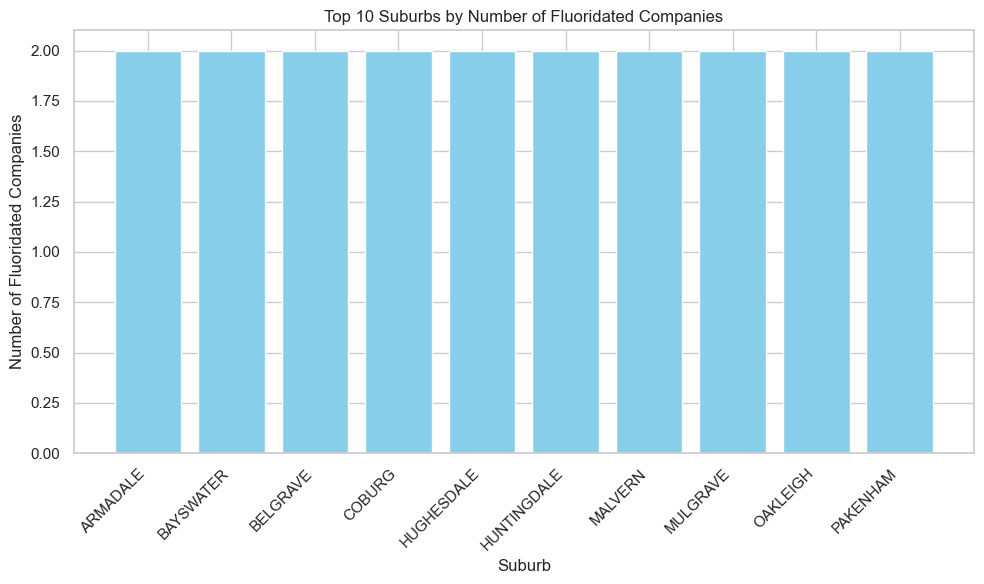

In [9]:
#Ans9 - Histogram of top 10 suburbs with fluoriated companies
#selecting the top 10 suburbs based on the number of fluoridated companies using nlargest().
top_10_suburbs = fluoridated_water_companies_per_suburb.nlargest(10)

#Then, plotting a histogram using plt.bar() to visualize the distribution of fluoridated companies across these top 10 suburbs.
plt.figure(figsize=(10, 6))
plt.bar(top_10_suburbs.index, top_10_suburbs.values, color='skyblue')
plt.xlabel('Suburb')
plt.ylabel('Number of Fluoridated Companies')
plt.title('Top 10 Suburbs by Number of Fluoridated Companies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#The histogram will show the number of fluoridated companies for each of the top 10 suburbs. It helps us understand which suburbs have the highest number of fluoridated companies and how they compare to each other in terms of fluoridation.


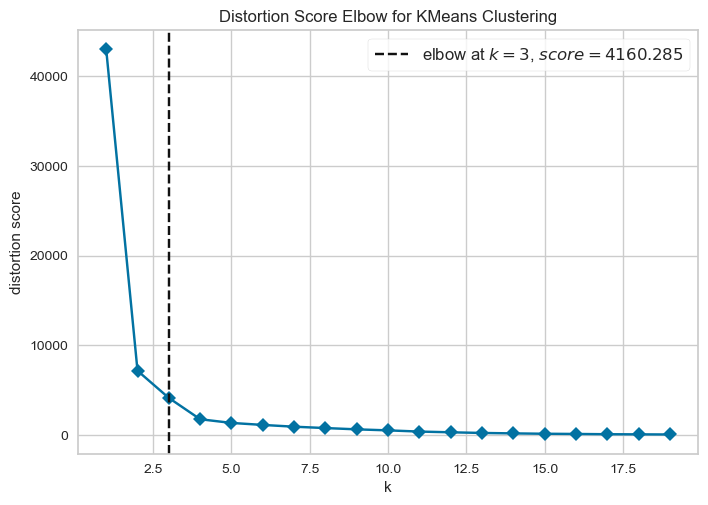

Optimal number of clusters using elbow method: 3


In [10]:
#Ans10 - Clustering and finding optimal k
#Importing necessary packages
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import warnings

#Filtering warnings
warnings.filterwarnings("ignore")

# Reading the dataset
df = pd.read_csv("FluoridationData.csv")

# Selecting just fluoride_level and water_company because the other features such as cartodb_id, melbourne, postcode, id, townsuburb, lat and lon are irrelavent for analysing water companies in Austraila in this case.
df_subset = df[['fluoride_level', 'water_company']]

# Encoding categorical features
label_encoder = LabelEncoder()
df_subset['fluoride_level'] = label_encoder.fit_transform(df_subset['fluoride_level'])
df_subset['water_company'] = label_encoder.fit_transform(df_subset['water_company'])

#KMeans model
model = KMeans(random_state=42, n_init=10)

# Instantiating the KElbowVisualizer with the KMeans model for calculating optimal k
visualizer = KElbowVisualizer(model, k=(1, 20), timings=False)

# Fitting the visualizer to the data
visualizer.fit(df_subset)

# Storing the optimal value of k
optimal_k = visualizer.elbow_value_

# Finalizing and displaying the plot
visualizer.show()

print("Optimal number of clusters using elbow method:", optimal_k)


Silhouette Score using K-Means: 0.6460446574068798


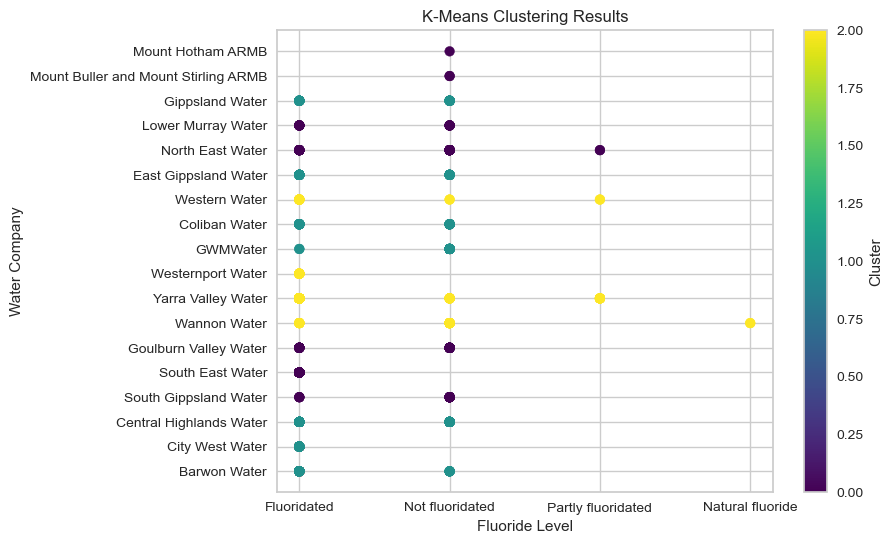

In [18]:
#Ans11 - Running KMeans and reporting performance
#Importing necessary packages
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import random

# Performing KMeans clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=random.randint(1,42000), n_init=10)
kmeans.fit(df_subset)

# Getting cluster labels for each data point
cluster_labels = kmeans.labels_

# Calculating silhouette score (As purity needs true class labels, which is unavailable, I am calculating Silhouette coefficient to compare the result)
silhouette_avg_km = silhouette_score(df_subset, cluster_labels)
print("Silhouette Score using K-Means:", silhouette_avg_km)

# Plotting clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['fluoride_level'], data['water_company'], c=cluster_labels, cmap='viridis', alpha=1)
plt.title('K-Means Clustering Results')
plt.xlabel('Fluoride Level')
plt.ylabel('Water Company')
plt.colorbar(label='Cluster')
plt.show()

Silhouette Score using K-Means++: 0.6631206847612415


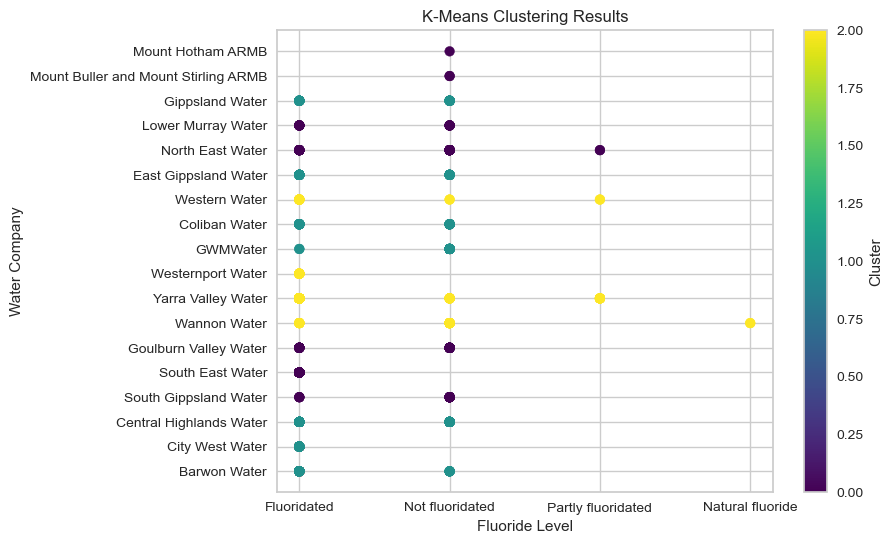

It is evident from the Silhoutte score and graph that K-Means++ performed better than K-Means


In [19]:
#Ans12 - Running KMeans plus plus and reporting performance
# Performing KMeans++ clustering with optimal number of clusters
kmeans_pp = KMeans(n_clusters=optimal_k, init='k-means++', random_state=random.randint(1,42000), n_init=10)
kmeans_pp.fit(df_subset)

# Getting cluster labels for each data point
cluster_labels_pp = kmeans_pp.labels_

# Adding cluster labels to the DataFrame
df_subset['cluster'] = cluster_labels_pp

# Calculating silhouette score (As purity needs true class labels, which is unavailable, I am calculating Silhouette coefficient to compare the result)
silhouette_avg_pp = silhouette_score(df_subset, cluster_labels_pp)
print("Silhouette Score using K-Means++:", silhouette_avg_pp)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['fluoride_level'], data['water_company'], c=cluster_labels_pp, cmap='viridis', alpha=1)
plt.title('K-Means Clustering Results')
plt.xlabel('Fluoride Level')
plt.ylabel('Water Company')
plt.colorbar(label='Cluster')
plt.show()

#Comparison of performance between Kmeans and Kmeans++
if silhouette_avg_pp > silhouette_avg_km:
    print("It is evident from the Silhoutte score and graph that K-Means++ performed better than K-Means")
elif silhouette_avg_pp < silhouette_avg_km:
    print("It is evident from the Silhoutte score and graph that K-Means performed better than K-Means++")
else:
    print("Both performs very similarly")

Optimum eps: 0.1
Optimum min_samples: 2
Total numbers of clusters produced:  16
Best Silhouette Score: 0.9990557129367328


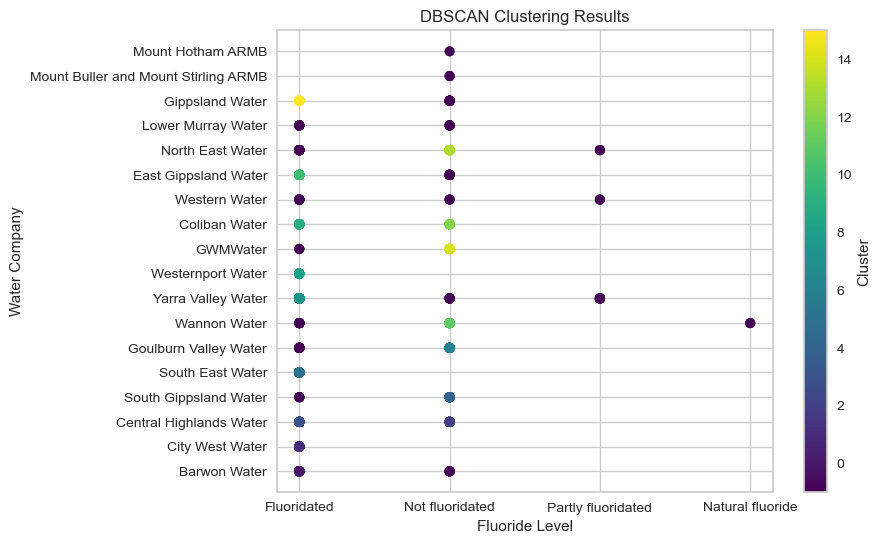

Comparison of K-Means, K-Means++ and DBSCAN:
The Silhouette score produced by K-Means is 0.6460446574068798
The Silhouette score produced by K-Means++ is 0.6631206847612415
The Silhouette score produced by DBSCAN is 0.9990557129367328


The optimal clusters choosen for K-Means and K-Means++ is 3
The optimal clusters choosen for DBSCAN is 16

In conclusion:
The best performing model in this case is DBSCAN with Silhouette score 0.9990557129367328


In [22]:
#Ans13 - Using DBSAN for clustering and comparing the result with KMeans and KMeeans++
#Importing DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np

# Reading the dataset
df = pd.read_csv("FluoridationData.csv")

# Selecting the relevant columns as the other columns are irrelavent in this case
df_subset = df[['fluoride_level', 'water_company']]

# Encoding categorical features using label encoder
label_encoder = LabelEncoder()
df_subset['fluoride_level'] = label_encoder.fit_transform(df_subset['fluoride_level'])
df_subset['water_company'] = label_encoder.fit_transform(df_subset['water_company'])

# Defining a range of eps values from 0.1, eventually stepping up by 0.1 to 1.0
eps_values = np.arange(0.1, 1.0, 0.1)
# Defining a range of min_samples values from 2 to 21
min_samples_values = range(2, 21)
#Creating and assigning variables to a default value
best_eps = None
best_min_samples = None
best_silhouette_score =-1
avgs = []
# Iterating over eps and min_samples values to find the optimum combination
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df_subset)
        labels = dbscan.labels_
        # Counting the number of clusters (excluding outliers, labeled as-1)
        num_clusters = len(set(labels))- (1 if-1 in labels else 0)
        #Calculating Silhouette score
        silhouette_avg = silhouette_score(df_subset, labels)
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples
#Displaying result
print("Optimum eps:", best_eps)
print("Optimum min_samples:", best_min_samples)
print("Total numbers of clusters produced: ",num_clusters)
print("Best Silhouette Score:", best_silhouette_score)

# Plotting clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['fluoride_level'], df['water_company'], c=labels, cmap='viridis', alpha=1)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Fluoride Level')
plt.ylabel('Water Company')
plt.colorbar(label='Cluster')
plt.show()

#Comparing the result
sil_scores = {"K-Means":silhouette_avg_km, "K-Means++":silhouette_avg_pp, "DBSCAN":best_silhouette_score}
clusters_dict = {"K-Means and K-Means++": optimal_k, "DBSCAN":num_clusters}
print("Comparison of K-Means, K-Means++ and DBSCAN:")

for key, value in sil_scores.items():
    print(f"The Silhouette score produced by {key} is {value}")
print("\n")
for key, value in clusters_dict.items():
    print(f"The optimal clusters choosen for {key} is {value}")
print("\nIn conclusion:")
max_key = max(sil_scores, key=lambda k: sil_scores[k])
print(f"The best performing model in this case is {max_key} with Silhouette score {sil_scores[max_key]}")
